# Building a YES/NO link between clothing and shoes

In [1]:
# %load_ext autoreload
# %autoreload 2

import os
import numpy as np
import random
from loading import load_files

from visuals import view_two_images

%matplotlib inline

### Manual Labeling of clothing -> shoe of yes/no

In [ ]:
# get all files for a provided path
# def get_paths(path):
#     data = load_files(path, ignore_files='.DS_Store')
#     clothing_files = np.array(data['filenames'])
#     return clothing_files

In [2]:
# get all files for specific paths
def specific_paths(cloth_cat, shoe_cat):
    all_cloth_paths = []
    cloth_path = '../data/clothing2/' + cloth_cat
    cloth_files = os.listdir(cloth_path)
    for file in cloth_files:
        all_cloth_paths.append(cloth_path + file)
        
    all_shoe_paths = []
    shoe_path = '../data/shoes/' + shoe_cat
    shoe_files = os.listdir(shoe_path)
    for file in shoe_files:
        all_shoe_paths.append(shoe_path + file)    
    return all_cloth_paths, all_shoe_paths

In [1904]:
clothing_train, shoe_train = specific_paths('train/black_skinny_jeans/', 'train/athletic/')
clothing_test, shoe_test = specific_paths('test/black_skinny_jeans/', 'test/athletic/')
clothing_valid, shoe_valid = specific_paths('validate/black_skinny_jeans/', 'validate/athletic/')
clothing = clothing_train + clothing_test + clothing_valid
shoes = shoe_train + shoe_test + shoe_valid
print(len(clothing), len(shoes))

186 3079


In [1652]:
# clothing_train, shoe_train2 = specific_paths('train/red_short_dresses/', 'train/flats/')
# clothing_test, shoe_train3 = specific_paths('test/red_short_dresses/', 'validate/flats/')
clothing_valid, shoe_train4 = specific_paths('validate/red_short_dresses/', 'train/sandals/')
clothing_valid, shoe_train5 = specific_paths('validate/red_short_dresses/', 'validate/sandals/')
# clothing = clothing_train + clothing_test + clothing_valid
shoes += shoe_train4 + shoe_train5 #+ shoe_train4 + shoe_train5
print(len(clothing), len(shoes))

186 6911


# NOTE TO SELF 
**continue with long sleeve tops...**

In [ ]:
# SAY NO TO THESE WITH ANY BLACK ITEMS
# Index(['../data/shoes/train/sandals/7403242.143549.jpg',
#        '../data/shoes/train/sandals/7294254.129876.jpg',
#        '../data/shoes/train/sandals/7568870.232137.jpg',
#        '../data/shoes/test/sandals/7294253.129876.jpg'],

# SAY NO TO THESE WITH ANY BLACK ITEMS
# Index(['../data/shoes/test/heels/8099618.14.jpg',
#        '../data/shoes/train/sandals/8014603.3528.jpg',
#        '../data/shoes/train/sandals/7990708.422.jpg',
#        '../data/shoes/train/heels/7751712.14.jpg'],

In [1905]:
i = 0

../data/shoes/train/sandals/7403242.143549.jpg


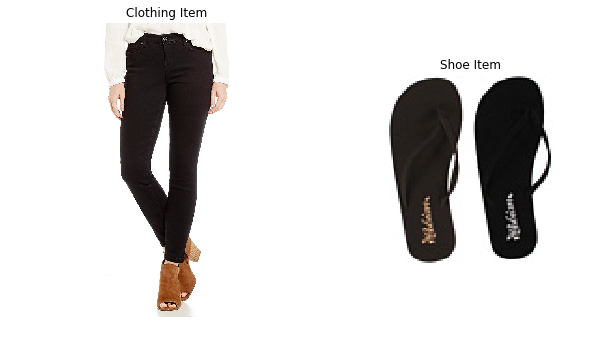

In [2008]:
path1 = clothing[i]
if '.DS_Store' in path1:
    i += 1
    path1 = clothing[i]
    
path2 = '../data/shoes/train/sandals/7403242.143549.jpg' # random.sample(shoes, 1)[0]
if '.DS_Store' in path2:
    path2 = random.sample(shoes, 1)[0]
view_two_images(path1, path2)
print(path2)

In [2009]:
# provide a response of 1/0 if the items go together
response = input()
assert (response == '0' or response == '1')
if response == '1':
    i += 1
file = open('../data/links.txt','a') 
file.write(f'{path1},{path2},{response}') 
file.write('\n')
file.close()
i += 1

0


In [1259]:
i

101

In [1666]:
import pandas as pd
df = pd.read_csv('../data/links.txt')

In [358]:
print(df.shape)
df.head()

(7441, 3)


,clothing_path,shoe_path,response
0,../data/clothing2/train/light_blue_short_dress...,../data/shoes/train/athletic/8140605.151.jpg,0
1,../data/clothing2/train/brown_suede_jackets/br...,../data/shoes/train/knee_boots/7347958.281.jpg,0
2,../data/clothing2/validate/long_sleeve_tops/lo...,../data/shoes/train/ankle_boots/8112971.72.jpg,1
3,../data/clothing2/train/white_pants/white_pant...,../data/shoes/test/sandals/7505095.6.jpg,1
4,../data/clothing2/train/spring_floral_dresses/...,../data/shoes/train/sandals/8081068.4535.jpg,0


In [359]:
df['response'].value_counts()

0    5058
1    2383
Name: response, dtype: int64

# Label Shoes with the nearest average color

In [ ]:
from glob import glob
import color_extractor
import pandas as pd
import pickle

In [ ]:
wildroot = '../data/shoes/*/*/*.jpg'
shoe_paths = glob(wildroot)
len(shoe_paths)

In [ ]:
shoe_cats = {'ankle_boots': 1, 
             'athletic': 2, 
             'calf_boots': 3, 
             'flats': 4, 
             'heels': 5, 
             'knee_boots': 6, 
             'sandals': 7}


In [ ]:
shoe_tags = []
for path in shoe_paths:
    try:
        folder = path.split('/')[3]
        sub_folder = path.split('/')[4]
        num, color = color_extractor.classify_image(path)
        new_cat = str((num+1)) + str(shoe_cats[sub_folder])
        shoe_tags.append((folder, path, new_cat, sub_folder, color))
    except IndexError:
        print(path)

In [ ]:
shoe_tags_df = pd.DataFrame(shoe_tags, columns=['type', 'path', 'class', 'shoe_type', 'color'])
pickle.dump(shoe_tags_df, open("saved_models/shoe_tags_df.pickle", "wb" ))
print(shoe_tags_df.shape)
shoe_tags_df.head()

In [ ]:
shoe_labels = pd.get_dummies(shoe_tags_df, prefix='class', columns=['class'])
pickle.dump(shoe_labels, open("saved_models/shoe_labels_df.pickle", "wb" ))
shoe_labels

In [ ]:
len(shoe_tags_df['class'].value_counts(dropna=False))

In [ ]:
shoe_tags_df['color'].value_counts(dropna=False)

In [ ]:
# import os 
# rejects = shoe_tags_df[shoe_tags_df['class'].isin(['76'])]
# rejects
# # for path in rejects['path']:
# #     os.remove(path)

In [ ]:
import visuals
visuals.view_one_image('../data/shoes/train/knee_boots/8072841.1892.jpg')